# Análise do Perfil dos Clientes - SPC Brasil

O SPC Brasil é uma empresa de tecnologia vinculada à CNDL para processar e armazenar todas as operações de crédito realizadas pelas empresas. É um serviço de informações de crédito, que utiliza informações de adimplência e inadimplência de pessoas físicas ou jurídicas para fins de decisão sobre crédito. Possuem produtos como o Cadastro positivo entre outros.
![spc](../imagens/logo_spc.png)

Ao longo da análise do dataset enviado pela empresa, será demostrado alguns *insights*.

<a name='TOPO'></a>
<h1>Índice</h1>
<ol>
<li><a href='#DATACLEANING'>Limpeza de Dados e primeiras Análises do Dataset</a></li>
<li><a href='#DATAANALYSIS'>Análise dos Dados e Visualização dos Dados</a></li>
<li><a href='#DATAVISUALIZATION'>Visualização dos Dados (Data Visualization)</li>
<li><a href='#CONCLUSAO'>Conclusão</li>
</ol>

<a name='DATACLEANING'></a>
<h1>Limpeza de Dados e primeiras Análises do Dataset</h1>

Análise inicial do dataset e algumas transformações necessárias para as análises futuras.

In [88]:
#importa os módulos
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import chardet

In [89]:
#Leitura do dataset
with open('dataset_v01.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

data = pd.read_csv('dataset_v01.csv', sep=',', encoding=result['encoding'])

In [90]:
# Cabeçalho do dataset e suas primeiras 5 linhas
data.head()

,id,dat_nsc,renda,latitude,longitude
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,1981-01-30 00:00:00,"DE R$ 1.900,00 A R$ 3.800,00",-4.847580,-37.784390
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,1978-01-28 00:00:00,"DE R$ 3.800,00 A R$ 7.600,00",-26.990118,-48.637165
2,2d729b8a-d53c-48e7-8bf5-33b021980c04,1954-12-09 00:00:00,"DE R$ 3.800,00 A R$ 7.600,00",-5.053671,-42.813152
3,62c0f1e6-36f2-4205-a134-232a58a6f8a5,1975-08-28 00:00:00,"DE R$ 788,00 A R$ 1.140,00",-15.059042,-48.163372
4,0cef9719-0aa3-49a2-adea-9c09c04de071,1957-06-17 00:00:00,"DE R$ 788,00 A R$ 1.140,00",-17.694658,-42.522280


In [91]:
# Quantas colunas e linhas o dataset possui
data.shape

(10000, 5)

In [92]:
# Informações básicas com os tipos de dados das colunas e se há ou não dados faltantes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10000 non-null  object 
 1   dat_nsc    9936 non-null   object 
 2   renda      10000 non-null  object 
 3   latitude   8743 non-null   float64
 4   longitude  8743 non-null   float64
dtypes: float64(2), object(3)
memory usage: 390.8+ KB


Podemos observar que apesar de termos 10000 clientes cadastrados, sabemos a localização de apenas 8743. Portanto os dados faltantes serão retirados para não prejudicar a análise.

In [93]:
# Somatório dos dados faltantes por colunas do dataset
data.isnull().sum()

id              0
dat_nsc        64
renda           0
latitude     1257
longitude    1257
dtype: int64

In [94]:
# Valores únicos da coluna renda
data.renda.unique()

array(['DE R$ 1.900,00 A R$ 3.800,00', 'DE R$ 3.800,00 A R$ 7.600,00',
       'DE R$ 788,00 A R$ 1.140,00', 'MAIOR QUE R$ 7.600,00'],
      dtype=object)

Foi observado que o dataset não possui clientes da faixa salarial de  1.140,00  - 1.190,00

A coluna 'dat_nasc' está como objeto. Portanto a coluna foi transformada em datetime e logo após foi separado o ano, mês, dia e hora e novas colunas foram criadas.

In [95]:
data['dat_nsc'] = pd.to_datetime(data['dat_nsc'])
data['ano'], data['mes'], data['dia'], data['hora']  = data['dat_nsc'].apply(lambda x: x.year), data['dat_nsc'].apply(lambda x: x.month), data['dat_nsc'].apply(lambda x: x.day), data['dat_nsc'].apply(lambda x: x.hour) 

data.head(2)

,id,dat_nsc,renda,latitude,longitude,ano,mes,dia,hora
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,1981-01-30,"DE R$ 1.900,00 A R$ 3.800,00",-4.847580,-37.784390,1981.0,1.0,30.0,0.0
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,1978-01-28,"DE R$ 3.800,00 A R$ 7.600,00",-26.990118,-48.637165,1978.0,1.0,28.0,0.0


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         10000 non-null  object        
 1   dat_nsc    9936 non-null   datetime64[ns]
 2   renda      10000 non-null  object        
 3   latitude   8743 non-null   float64       
 4   longitude  8743 non-null   float64       
 5   ano        9936 non-null   float64       
 6   mes        9936 non-null   float64       
 7   dia        9936 non-null   float64       
 8   hora       9936 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 703.2+ KB


O campo **"dat_nsc"** que antes era do tipo *object* foi convertido para *datetime* e as novas colunas se transformaram no tipo *int*. Isso permite realizar cálculos, já que agora Python considera as informações como números.

Abaixo, as informações de todas as colunas númericas. O comando *describe* nos retorna informações como média, valor mínimo e máximo, quartis, dentre outras.

In [97]:
# Descrição das colunas númericas do dataset.

data.describe()

,latitude,longitude,ano,mes,dia,hora
count,8743.000000,8743.000000,9936.000000,9936.000000,9936.000000,9936.0
mean,-18.361572,-47.089993,1968.011977,6.474537,15.642411,0.0
std,8.386566,6.355891,15.123420,3.422645,8.793913,0.0
min,-33.532970,-72.931910,1900.000000,1.000000,1.000000,0.0
25%,-23.650299,-51.160159,1961.000000,4.000000,8.000000,0.0
50%,-20.628450,-47.730556,1973.000000,6.000000,16.000000,0.0
75%,-11.803611,-43.179613,1978.000000,9.000000,23.000000,0.0
max,3.359722,-34.803765,2001.000000,12.000000,31.000000,0.0


É possivel observar que 75% dos clientes nasceram no ano de 1978

O dataframe possui coluna de  latitude e longitude. Para manipular os dados, será necessário transformar-lo em um geodataframe, por isso foi utilizado o módulo geopandas para fazer a conversão.

In [98]:
import geopandas
from shapely.geometry import Point, LineString, Polygon

In [102]:
data['longitude'] = data['longitude'].replace(r'\s+', np.nan, regex=True)
data['longitude'] = data['longitude'].replace(r'^$', np.nan, regex=True)
data['longitude'] = data['longitude'].fillna(-0.99999)
data['longitude'] = pd.to_numeric(data['longitude'])
data['latitude'] = data['latitude'].replace(r'\s+', np.nan, regex=True)
data['latitude'] = data['latitude'].replace(r'^$', np.nan, regex=True)
data['latitude'] = data['latitude'].fillna(-0.99999)
data['latitude'] = pd.to_numeric(data['latitude'])

In [18]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

Uma nova coluna **'geometry'** foi criada

In [17]:
gdf.head(2)

,id,dat_nsc,renda,latitude,longitude,ano,mes,dia,hora,geometry
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,1981-01-30,"DE R$ 1.900,00 A R$ 3.800,00",-4.847580,-37.784390,1981,1,30,0,POINT (-37.78439 -4.84758)
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,1978-01-28,"DE R$ 3.800,00 A R$ 7.600,00",-26.990118,-48.637165,1978,1,28,0,POINT (-48.63717 -26.99012)


<AxesSubplot:>

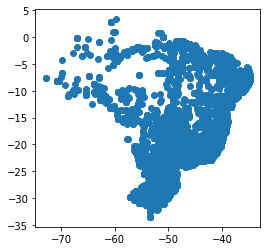

In [16]:
# Um plot simples para verificar a localização dos clientes.

gdf.plot()

<a name="DATAANALYSIS"></a>
<a href='#TOPO'>Voltar ao índice</a>
<h1>Análise e Visualização dos Dados </h1>

Bom, até o momento realizamos a limpeza em nossos dados para deixá-los melhores para realizar processos de cálculos e plotagem. A partir de agora, vamos realizar alguns *Insights* a partir das informações contidas nessa planilha.
Além de outras perguntas, queremos sanar os seguintes questionamentos:

- Qual é a faixa etária dos clientes?
- Qual a faixa salarial de maior ocorrência?
- Qual a Faixa Salarial de cada Geração?
- Os clientes estão concentrados em quais municípios/regiões?
- Qual segmento teremos ao agrupar dados do Município, Faixa Salarial e Faixa Etária?

### Qual a faixa etária dos clientes?

Foi criado uma nova coluna com a idade dos cliente.

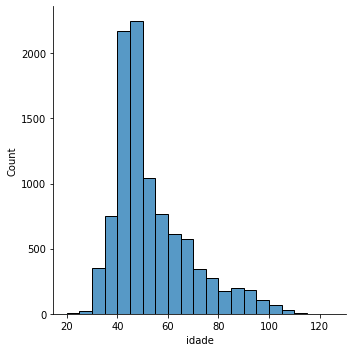

In [103]:
#Função que defina a idade dos clientes de acordo com a coluna ano
data['idade']  = data['ano'].apply(lambda x: 2021 - x)

#Histograma com a distribuição da idade dos clientes
sns.displot(data, x="idade", bins=30, binwidth=5)

Para verificar a Assimetria da Distribuição de clientes por idade foi verificado o *skewness*. Ao analisar o histograma podemos perceber que a assimetria é positiva, pois a cauda está para o lado direito. A média e a mediana também está à direita.

In [104]:
#Mediana do ano de nascimento
data.idade.median()

48.0

In [105]:
#Média do ano de nascimento
data.idade.mean()

52.988023349436396

In [106]:
#Moda do ano de nascimento
data.idade.mode()

0    45.0
dtype: float64

In [107]:
# Assimetria - Skewness
data.idade.skew()

1.2516207961843453

Assimetria Positiva - Quando o skewness é menor que -1 maior que 1, os dados são altamente assimétricos

Vamos plotar um Histograma da coluna **'ano'** para visualizar os anos de nascimento dos clientes

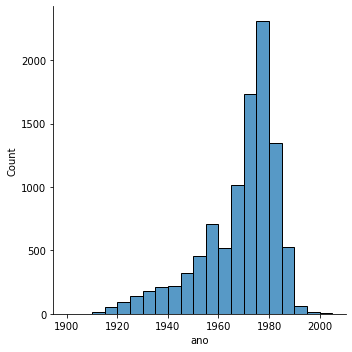

In [108]:
sns.displot(data, x="ano", bins=30, binwidth=5)

Para verificação de *Outliers* foi plotado um gráfico do tipo *BoxPlot*

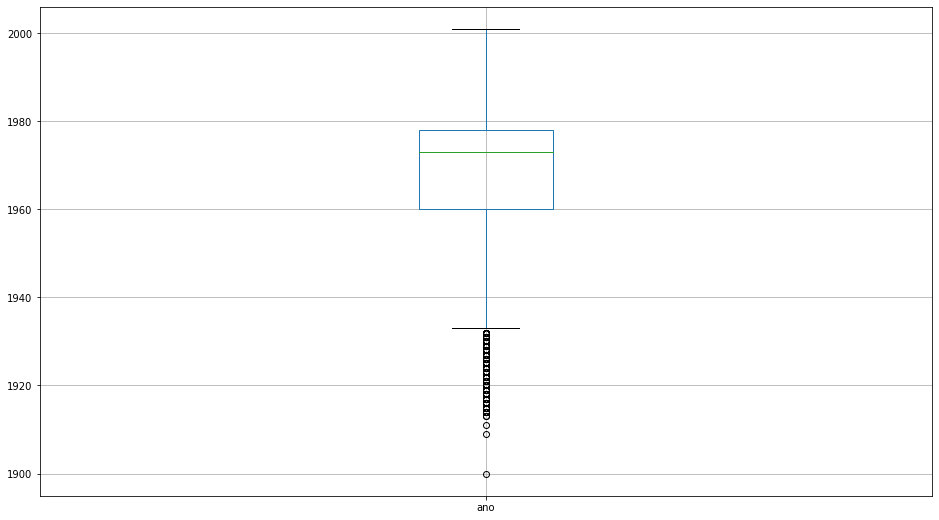

In [109]:
plt.rcParams["figure.figsize"] = [16,9]
boxplot = gdf.boxplot(column=['ano'])

Como já observado no *Describe*, podemos observar que nossa massa de clientes está entre os anos de 1960 a 1979. Há alguns valores isolados logo abaixo nos anos de 1900 a ~1936

Após uma revisão bibliográfica em alguns artigos, pode se perceber que algumas empresas de marketings segmentam seus clientes de acordo com o Recorte de Gerações.
Os anos na divisão de gerações diferem de um artigo para o outro. Para esse estudo foi utilizado as informações de 2017 da Revista Exame (https://bit.ly/2PxsdBy) e de 2018 do SINGEP (https://bit.ly/3flbqgh).
![geracoes](../imagens/geracoes.png)

In [110]:
#Criação de categorias para Gerações
gdf['geracoes'] = pd.cut(gdf['ano'],
        bins = (1900, 1940, 1960, 1980, 1994, 2001),
        labels = ('1900 a 1940 - Veteranos', '1940 a 1959 - Baby Boomers ', '1960 a 1979 - Geração X', '1980 a 1994 - Geração Y', '1994 a 2010 - Geração Z'))

In [111]:
gdf.head(2)

,id,dat_nsc,renda,latitude,longitude,ano,mes,dia,hora,geometry,geracoes,idade
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,1981-01-30,"DE R$ 1.900,00 A R$ 3.800,00",-4.847580,-37.784390,1981,1,30,0,POINT (-37.78439 -4.84758),1980 a 1994 - Geração Y,40
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,1978-01-28,"DE R$ 3.800,00 A R$ 7.600,00",-26.990118,-48.637165,1978,1,28,0,POINT (-48.63717 -26.99012),1960 a 1979 - Geração X,43


### Qual a faixa salarial de maior ocorrência?

Quais as faixas salariais que nossos clientes se encontram?
Ao verificar os valores contidos na coluna **renda**, percebeu-se que está 

In [112]:
data.renda.unique()

array(['DE R$ 1.900,00 A R$ 3.800,00', 'DE R$ 3.800,00 A R$ 7.600,00',
       'DE R$ 788,00 A R$ 1.140,00', 'MAIOR QUE R$ 7.600,00'],
      dtype=object)

In [113]:
import plotly.express as px
df = px.data.tips()
fig = px.pie(gdf, names='renda')
fig.update_layout(showlegend=True)
fig.show()

Cerca de 48% dos Clientes estão na faixa salarial de 1.900,00 - 3.000,00

### Qual a Faixa Salarial de cada Geração?

<AxesSubplot:title={'center':'Faixa Salarial por Geração'}, xlabel='geracoes'>

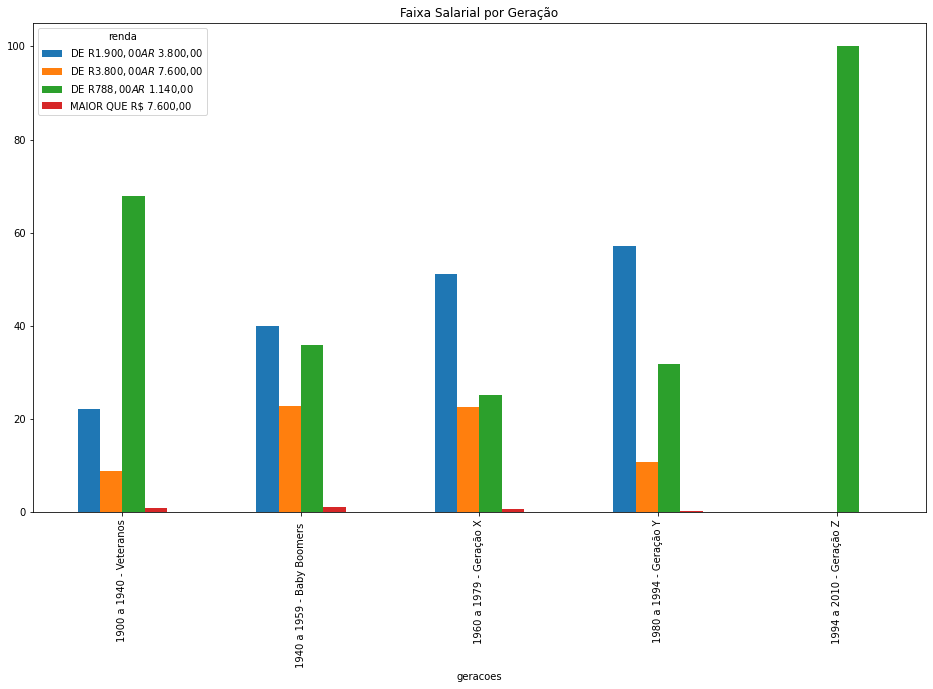

In [114]:
#Cruzamento dos dados das geraçoes por renda
renda_geracao = pd.crosstab(gdf['geracoes'],gdf['renda']).apply(lambda r: r/r.sum(), axis=1) * 100
renda_geracao.plot(kind='bar',width=0.5, title='Faixa Salarial por Geração')

### Os clientes estão concentrados em quais municípios/regiões?

Para Visualização das regiões com mais incidência de clientes, iremos utilizar a Biblioteca Folium.

In [115]:
import folium
from folium import plugins

In [7]:
# Elimina as linhas que possuem dados faltantes
data.dropna(inplace=True)
data.isnull().sum()

id           0
dat_nsc      0
renda        0
latitude     0
longitude    0
dtype: int64

### Criação de um Mapa com a localização e o agrupamento dos clientes

In [116]:
from folium.plugins import FastMarkerCluster
import sys

In [117]:
# Cria o Mapa
fmap = folium.Map(
                location=[-16.1237611, -59.9219642],   
                zoom_start=4,
                control_scale=True,
                prefer_canvas=True)

In [118]:
#Cria os clusters
cluster_df = gdf[['latitude', 'longitude']]
cluster_df = cluster_df.dropna(axis=0, subset=['latitude','longitude'])

# List comprehension to make out list of lists
cluster_data = [[row['latitude'],row['longitude']] for index, row in cluster_df.iterrows()]

# Plot it on the map
FastMarkerCluster(cluster_data).add_to(fmap)

# Display the map
fmap

### Criação de um Mapa de calor com a localização dos clientes

In [119]:
from folium.plugins import HeatMap

In [120]:
# Cria o Mapa
fmap = folium.Map(
                location=[-16.1237611, -59.9219642],   
                zoom_start=4,
                control_scale=True,
                prefer_canvas=True)

In [121]:
heat_df = gdf[['latitude', 'longitude']]
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude'])

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(fmap)

# Display the map
fmap

### Mas em quais Estados e Municipíos os clientes estão??

Para isso, foi utilizado os dados do IBGE no site: https://bit.ly/39e59PB

Foi escolhido o zip **BR_Municipios_2020** para criar um geodaframe com o *geometry* da Malha Municipal

In [122]:
brasil = geopandas.read_file('BR_Municipios_2020.shp')

In [123]:
brasil.head(5)

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."


In [124]:
# For para descobrir quantos clientes por municipio e a criação de uma nova coluna com o
# número de clientes.

for index, municipio in brasil.iterrows():
  qtd_cliente = len(gdf[gdf.intersects(municipio.geometry)])
  brasil.loc[index, 'qtd_cliente'] = qtd_cliente

In [125]:
brasil.head(5)

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,qtd_cliente
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...",2.0
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...",4.0
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...",0.0
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...",1.0
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...",3.0


Qual o Top 10 municípios com mais clientes:

In [127]:
brasil.nlargest(10,["qtd_cliente"])

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,qtd_cliente
3242,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((-43.56883 -23.08162, -43.56886...",394.0
4931,4314902,Porto Alegre,RS,495.390,"MULTIPOLYGON (((-51.16347 -30.26269, -51.16317...",188.0
2162,2927408,Salvador,BA,693.453,"POLYGON ((-38.56330 -12.73664, -38.56117 -12.7...",172.0
4005,4106902,Curitiba,PR,434.892,"POLYGON ((-49.26489 -25.34813, -49.26455 -25.3...",141.0
3829,3550308,São Paulo,SP,1521.110,"POLYGON ((-46.54624 -23.35791, -46.54585 -23.3...",138.0
111,1302603,Manaus,AM,11401.092,"POLYGON ((-60.24162 -1.99757, -60.23298 -2.003...",136.0
5417,5208707,Goiânia,GO,728.841,"POLYGON ((-49.17655 -16.46519, -49.17717 -16.4...",116.0
2309,3106200,Belo Horizonte,MG,331.354,"POLYGON ((-43.94948 -19.77643, -43.94946 -19.7...",112.0
5569,5300108,Brasília,DF,5760.784,"POLYGON ((-47.41734 -15.54655, -47.41720 -15.5...",86.0
1596,2611606,Recife,PE,218.843,"POLYGON ((-34.99971 -7.92977, -34.99953 -7.929...",78.0


Temos dois geodataframes para fazer a uní-los, for realizado um inner join, com a Intersecção da coluna **'geometry'** 

In [130]:
#Importando módulos necessários para fazer o inner join
import rtree
import pygeos

In [131]:
gdf_total = geopandas.sjoin(gdf, brasil, how="inner", op='intersects')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4674




Ambos Geodataframes precisa estar com no mesmo Sistemas de Referência de Coordenadas
O *Coordinate Reference System* (CRS) é importante porque as formas geométricas em um objeto GeoSeries ou GeoDataFrame são simplesmente uma coleção de coordenadas em um espaço arbitrário. Um CRS informa ao Python como essas coordenadas se relacionam com os lugares da Terra.

In [132]:
#Comando necessário para para colocar o Geodataframe criado a partir do dataset no mesmo
#CRS do Geodataframe gerado a partir do ShapeFile do IBGE

gdf.set_crs(epsg=4674, inplace=True)

,id,dat_nsc,renda,latitude,longitude,ano,mes,dia,hora,geometry,geracoes,idade
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,1981-01-30,"DE R$ 1.900,00 A R$ 3.800,00",-4.847580,-37.784390,1981,1,30,0,POINT (-37.78439 -4.84758),1980 a 1994 - Geração Y,40
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,1978-01-28,"DE R$ 3.800,00 A R$ 7.600,00",-26.990118,-48.637165,1978,1,28,0,POINT (-48.63717 -26.99012),1960 a 1979 - Geração X,43
2,2d729b8a-d53c-48e7-8bf5-33b021980c04,1954-12-09,"DE R$ 3.800,00 A R$ 7.600,00",-5.053671,-42.813152,1954,12,9,0,POINT (-42.81315 -5.05367),1940 a 1959 - Baby Boomers,67
3,62c0f1e6-36f2-4205-a134-232a58a6f8a5,1975-08-28,"DE R$ 788,00 A R$ 1.140,00",-15.059042,-48.163372,1975,8,28,0,POINT (-48.16337 -15.05904),1960 a 1979 - Geração X,46
4,0cef9719-0aa3-49a2-adea-9c09c04de071,1957-06-17,"DE R$ 788,00 A R$ 1.140,00",-17.694658,-42.522280,1957,6,17,0,POINT (-42.52228 -17.69466),1940 a 1959 - Baby Boomers,64
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,da4f8470-b7db-46fd-9877-8761b1c8cadc,1978-08-28,"DE R$ 1.900,00 A R$ 3.800,00",-29.590373,-51.215816,1978,8,28,0,POINT (-51.21582 -29.59037),1960 a 1979 - Geração X,43
9995,f2261fce-83c5-4f64-b145-85f46bcf18b1,1979-10-08,"DE R$ 1.900,00 A R$ 3.800,00",-11.609372,-47.047506,1979,10,8,0,POINT (-47.04751 -11.60937),1960 a 1979 - Geração X,42
9996,bdaa7802-4650-44a4-93f7-952b72ec17a0,1980-04-30,"DE R$ 3.800,00 A R$ 7.600,00",-15.650497,-47.793321,1980,4,30,0,POINT (-47.79332 -15.65050),1960 a 1979 - Geração X,41
9997,e7b37cd5-714a-44d8-ad7f-4ed3aa6b0695,1976-05-26,"DE R$ 788,00 A R$ 1.140,00",-8.330679,-36.136897,1976,5,26,0,POINT (-36.13690 -8.33068),1960 a 1979 - Geração X,45


In [133]:
#Novamente o comando para dar o inner join entre os geodataframes
gdf_total = geopandas.sjoin(gdf, brasil, how="inner", op='intersects')

In [134]:
gdf_total.head(2)

,id,dat_nsc,renda,latitude,longitude,ano,mes,dia,hora,geometry,geracoes,idade,index_right,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,qtd_cliente
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,1981-01-30,"DE R$ 1.900,00 A R$ 3.800,00",-4.847580,-37.784390,1981,1,30,0,POINT (-37.78439 -4.84758),1980 a 1994 - Geração Y,40,985,2307007,Jaguaruana,CE,854.362,1.0
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,1978-01-28,"DE R$ 3.800,00 A R$ 7.600,00",-26.990118,-48.637165,1978,1,28,0,POINT (-48.63717 -26.99012),1960 a 1979 - Geração X,43,4337,4202008,Balneário Camboriú,SC,45.214,13.0


In [135]:
gdf_total.dtypes

id                     object
dat_nsc        datetime64[ns]
renda                  object
latitude              float64
longitude             float64
ano                     int64
mes                     int64
dia                     int64
hora                    int64
geometry             geometry
geracoes             category
idade                   int64
index_right             int64
CD_MUN                 object
NM_MUN                 object
SIGLA_UF               object
AREA_KM2              float64
qtd_cliente           float64
dtype: object

In [137]:
#Verificar as colunas do novo geodataframe
gdf_total.columns

Index(['id', 'dat_nsc', 'renda', 'latitude', 'longitude', 'ano', 'mes', 'dia',
       'hora', 'geometry', 'geracoes', 'idade', 'index_right', 'CD_MUN',
       'NM_MUN', 'SIGLA_UF', 'AREA_KM2', 'qtd_cliente'],
      dtype='object')

In [ ]:
gdf1 = gdf_total.drop(['dat_nsc', 'dia', 'hora', 'index_right','CD_MUN',
               'AREA_KM2', 'qtd_cliente'], axis=1)

In [ ]:
gdf_uf = gdf1.groupby(['SIGLA_UF','renda $', 'geracoes'])['id'].count()
brasil.nlargest(10,["qtd_cliente"])
gdf_rj = gdf1.query('SIGLA_UF == "RJ"')
gdf_rj_group = gdf_rj.groupby(['renda $', 'geracoes'])['id'].count()
gdf_rj_group

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import  PCA
from sklearn.preprocessing import  MinMaxScaler

In [ ]:
gdf1.tail(2)

In [ ]:
gdf1 = gdf1.drop(['renda'], axis=1)

In [ ]:
gdf1.head(2)

In [ ]:
gdf1['geracoes'] = pd.Categorical(gdf1['geracoes'])
gdf1['NM_MUN'] = pd.Categorical(gdf1['NM_MUN'])
gdf1['SIGLA_UF'] = pd.Categorical(gdf1['SIGLA_UF'])
gdf1['renda $'] = pd.Categorical(gdf1['renda $'])

In [ ]:
gdf1['geracoes_cat'] = gdf1['geracoes'].cat.codes
gdf1['cidade_cat'] = gdf1['NM_MUN'].cat.codes
gdf1['uf_cat'] = gdf1['SIGLA_UF'].cat.codes
gdf1['renda_cat'] = gdf1['renda $'].cat.codes


gdf1.head(2)

In [ ]:
gdf1.columns

In [ ]:
gdf1_seg = gdf1[['geracoes_cat', 'uf_cat', 'renda_cat']]

In [ ]:
gdf1_seg.head(2)

Encontrar Grupos de Clientes com características semelhantes

In [ ]:
#Normalização com média 0 e desvio 1
normaliza = MinMaxScaler()

In [ ]:
X_std = normaliza.fit_transform(gdf1_seg)

In [ ]:
#aplicando a curva do cotovelo para encontrar o número de clusters
ks = range(1,10)
inertias = []
for k in ks:
    #cria o objeto para modelo k-means para os testes
    model = KMeans(n_clusters=k)
    
    #aplica nos componentes selecionados
    model.fit(X_std)
    
    #adiciona os valores para a distância (agitação)
    inertias.append(model.inertia_)
    

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Número de Cluster, k')
plt.ylabel('Distâncias')
plt.xticks(ks)
plt.show()

## Aplicando o Kmeans

In [ ]:
gdf1_norma = pd.DataFrame(X_std, columns=['geracoes_cat', 'uf_cat', 'renda_cat'])

In [ ]:
gdf1_norma.head(2)

In [ ]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(gdf1_norma)
gdf1_norma['cluster'] = clusters
gdf1_norma.head(5)

In [ ]:
#retornando os dados
retorno = normaliza.inverse_transform(X_std)

In [ ]:
gdf1_retorno = pd.DataFrame(retorno, columns=['geracoes_cat', 'uf_cat', 'renda_cat'])
gdf1_retorno['cluster'] = clusters
gdf1_retorno.head()

In [ ]:
gdf1_retorno.groupby(['renda_cat', 'geracoes_cat'])['cluster'].count()

In [ ]:
gdf1.columns

In [ ]:
gdf1.groupby(['renda $', 'geracoes'])['id'].count()

In [ ]:
gdf_uf.head()

In [ ]:
gdf_rj.describe()

In [ ]:
gdf1_retorno.columns

In [ ]:
gdf1_retorno.groupby('renda_cat').agg({'cluster': 'count'}).rename(
                                                columns={'cluster': 'qtd'})

In [ ]:
media_lat = gdf1['latitude'].mean()
media_lon = gdf1['longitude'].mean()

In [ ]:
gdf1.isnull().sum()

In [ ]:
import folium

In [ ]:
gdf1.loc[gdf1.renda == 'DE R$ 1.900,00 A R$ 3.800,00', 'renda $'] = '1.900,00 - 3.800,00'
gdf1.loc[gdf1.renda == 'DE R$ 3.800,00 A R$ 7.600,00', 'renda $'] = '3.800,00 - 7.600,00'
gdf1.loc[gdf1.renda == 'DE R$ 788,00 A R$ 1.140,00', 'renda $'] = '788,00 - 1.140,00'
gdf1.loc[gdf1.renda == 'MAIOR QUE R$ 7.600,00', 'renda $'] = 'Maior que 7.600,00'